# IPL Data Analysis

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
import plotly as py
import cufflinks as cf

In [107]:
from plotly.offline import iplot

In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

### Matches Details

In [110]:
df = pd.read_csv('D:/Data Science/Data Visualization/DataVisualization/EDA on IPL Cricket Matches/matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### I am the Winner!!

In [111]:
winlost = df[['team1','team2','winner']]
winlost['losser'] = winlost.apply(lambda x : (x['team2'] if x['team1']==x['winner'] else x['team1']),axis=1)

In [112]:
winlost

,team1,team2,winner,losser
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Gujarat Lions
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Rising Pune Supergiant
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils
...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,Kolkata Knight Riders
752,Chennai Super Kings,Mumbai Indians,Mumbai Indians,Chennai Super Kings
753,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,Sunrisers Hyderabad
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,Delhi Capitals


In [113]:
wins = winlost['winner'].value_counts()

In [114]:
losts = winlost['losser'].value_counts()

In [115]:
wins.iplot(kind='bar')

In [116]:
losts.iplot(kind='bar')

In [117]:
df.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


### Man Of The Match

In [118]:
mom = df['player_of_match'].value_counts()
mom = mom.head(10)

In [119]:
mom.iplot(kind='bar')

### City

In [120]:
city = df['city'].value_counts()
city.iplot(kind='bar')

### Venue

In [121]:
venue = df['venue'].value_counts()
venue.head(20).iplot(kind='bar')

### MI Vs CSK (Indian Classico)

In [122]:
def get_micsk(team1,team2):
    teams=['Chennai Super Kings','Mumbai Indians']
    if team1 in teams and team2 in teams :
        return True
    else:
        return False

In [123]:
index= []
for row in df.iterrows():
    flag = get_micsk(row[1]['team1'],row[1]['team2'])
    index.append(flag)

In [124]:
sum(index)

28

In [125]:
micsk = df[index]
micsk.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
66,67,2008,Chennai,4/23/2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
95,96,2008,Mumbai,5/14/2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
117,118,2009,Cape Town,4/18/2009,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
161,162,2009,Port Elizabeth,5/16/2009,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
193,194,2010,Mumbai,3/25/2010,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN


In [126]:
micsk['winner'].value_counts().iplot(kind='bar')

### Seasonwise Winning

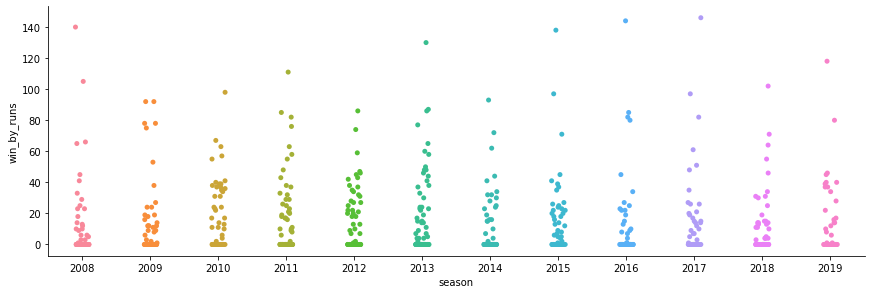

In [127]:
sns.catplot(x='season',y='win_by_runs',data=df,kind='strip',height=4,aspect=3)
plt.show()

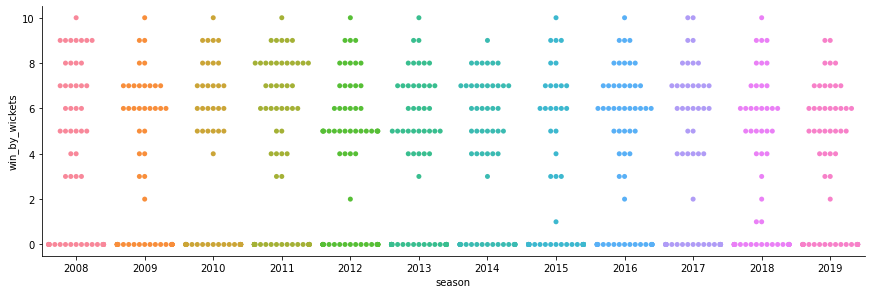

In [128]:
sns.catplot(x='season',y='win_by_wickets',data=df,kind='swarm',height=4,aspect=3)
plt.show()

### Ball by ball 

In [129]:
balls = pd.read_csv('D:/Data Science/Data Visualization/DataVisualization/EDA on IPL Cricket Matches/deliveries.csv')

In [130]:
balls.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Most ball facing Batsman

In [131]:
balls['batsman'].value_counts().head(20).iplot(kind='bar',yTitle='No Of Balls Faced')

### Most Non-striker End

In [132]:
balls['non_striker'].value_counts().head(20).iplot(kind='bar',yTitle='Balls Facing From Non-Striker End')

### Balls bowled by bowlers

In [133]:
balls['bowler'].value_counts().head(20).iplot(kind='bar',yTitle='Balls Bowled')

### Batting Team

In [134]:
balls.groupby('batting_team')[['batsman_runs','total_runs']].sum().iplot(kind='bar')

### Most dismissed Batsman

In [135]:
balls['player_dismissed'].value_counts().head(20).iplot(kind='bar')

#### Dismissal Kind

In [136]:
balls['dismissal_kind'].value_counts().iplot(kind='bar')